In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [107]:
df = pd.read_csv("IRIS.csv")

In [108]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
df.drop(columns=['species'], inplace=True)

In [110]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [111]:
df.duplicated().sum()

np.int64(3)

In [112]:
df.drop_duplicates(inplace=True)

In [113]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


In [114]:
x = df.drop(columns=['petal_length'])
x_std = StandardScaler().fit_transform(x)

GMM

In [115]:
from sklearn.mixture import GaussianMixture
bic_scores = []
n_componets_range = range(1,7)
for n in n_componets_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(x_std)
    bic_scores.append(gmm.bic(x_std))

In [116]:
optimal_n = n_componets_range[np.argmin(bic_scores)]
print(f"optimal n of cluster based on bic : {optimal_n}")

optimal n of cluster based on bic : 2


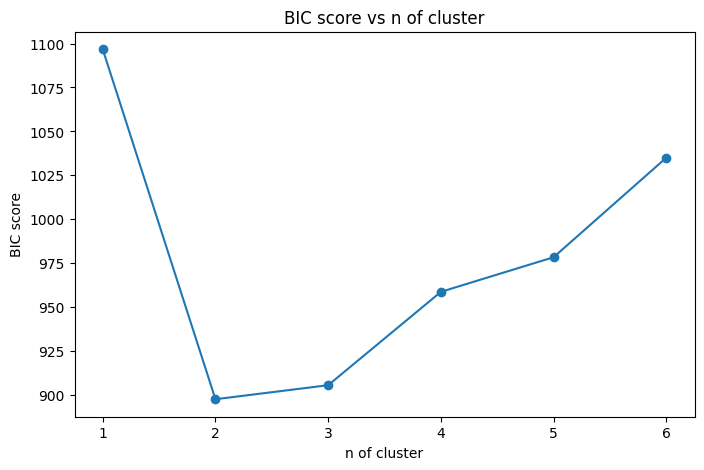

In [117]:
# plot BIC
plt.figure(figsize=(8,5))
plt.plot(n_componets_range,bic_scores,marker='o')
plt.title('BIC score vs n of cluster')
plt.xlabel('n of cluster')
plt.ylabel('BIC score')
plt.show()

In [118]:
GMM = GaussianMixture(n_components=optimal_n, random_state=42)
GMM.fit(x_std)
labels = GMM.predict(x_std)

In [119]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
df['species'] = labels

In [121]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,6.3,3.3,6.0,2.5,1


In [122]:
from sklearn.metrics import silhouette_score

s = silhouette_score(x_std, labels)
log_likelihood = gmm.score(x_std)

In [123]:
print(s)
print(log_likelihood)

0.5273318261175005
-2.5191236057181667


In [124]:
# gmm internal parameter
print(f"means : {gmm.means_}")
print("-----------------------")
print(f"weight : {gmm.weights_}")
print("-----------------------")
print(f"covarince : {gmm.covariances_}")

means : [[-0.22519903 -1.42307527 -0.01057673]
 [ 1.21056218  0.09839915  1.30980528]
 [-0.65444994  1.80796258 -1.23452268]
 [ 0.35442234 -0.30685108  0.44995001]
 [-1.39107041  0.10118097 -1.35194217]
 [-0.96713715  0.88608285 -1.22232155]]
-----------------------
weight : [0.1466006  0.1951132  0.10451858 0.33855888 0.11000939 0.10519935]
-----------------------
covarince : [[[ 4.32380403e-01  8.18909352e-02  2.23338988e-01]
  [ 8.18909352e-02  2.15794929e-01  4.59268868e-02]
  [ 2.23338988e-01  4.59268868e-02  1.71688229e-01]]

 [[ 4.68951453e-01  1.07093166e-01 -4.22079658e-02]
  [ 1.07093166e-01  5.11846400e-01  6.38896045e-02]
  [-4.22079658e-02  6.38896045e-02  6.39372856e-02]]

 [[ 1.05425386e-01  1.10702981e-01  3.23273760e-03]
  [ 1.10702981e-01  3.17931094e-01  6.49533447e-03]
  [ 3.23273760e-03  6.49533447e-03  1.76436253e-02]]

 [[ 3.68569959e-01  1.19389840e-01  3.70492885e-02]
  [ 1.19389840e-01  2.01027840e-01  1.70648056e-02]
  [ 3.70492885e-02  1.70648056e-02  1.0770

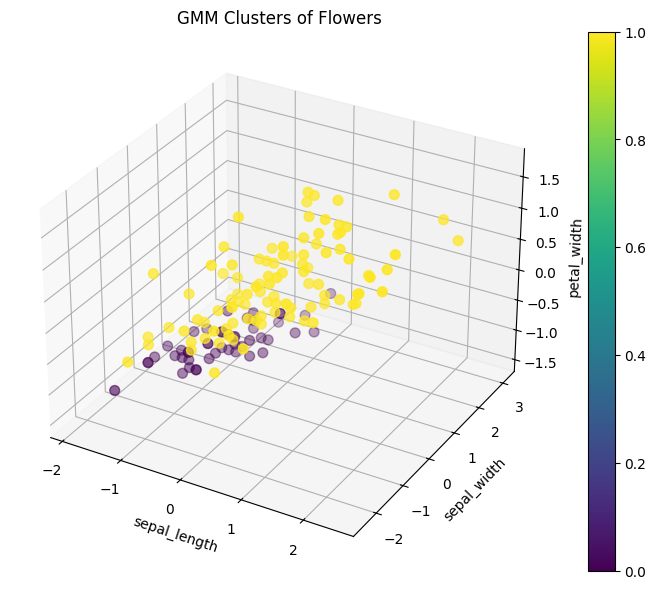

In [125]:
#3D Visualization of Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_std[:, 0], x_std[:, 1], x_std[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title('GMM Clusters of Flowers')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_width')
plt.colorbar(scatter)
plt.show()

KNN

In [126]:
from sklearn.preprocessing import MinMaxScaler

x_mm = MinMaxScaler().fit_transform(x)

In [127]:
from sklearn.cluster import KMeans

k_range = range(1,10)
score_wcss =[]

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_mm)
    score_wcss.append(kmeans.inertia_)

In [128]:
score_wcss

[27.143426660787778,
 10.086385045477925,
 6.0243247563728834,
 4.8892936172716235,
 3.9590687659082633,
 3.5160569510438506,
 3.22406982815016,
 2.937839633488739,
 2.4990375501554065]

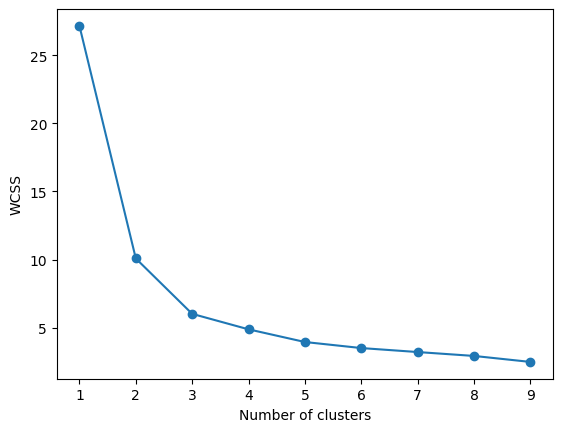

In [129]:
plt.plot(k_range, score_wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [130]:
from sklearn.metrics import silhouette_score

k_range = range(2,10)
score_silhouette =[]

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_mm)
    y_pred = kmeans.predict(x_mm)
    score_silhouette.append(silhouette_score(x_mm, y_pred))
    print('k= ', k, 'score= ', silhouette_score(x_mm, y_pred))

k=  2 score=  0.5727441517474657
k=  3 score=  0.4638497425671383
k=  4 score=  0.41713002051639564
k=  5 score=  0.34517422635750605
k=  6 score=  0.3155140908447027
k=  7 score=  0.3192176484355842
k=  8 score=  0.3073635763309792
k=  9 score=  0.32416805964387035


In [131]:
KM = KMeans(n_clusters=2)
KM.fit(x_mm)
KM_pred = KM.predict(x_mm)

In [132]:
KM.cluster_centers_

array([[0.19733796, 0.59635417, 0.0625    ],
       [0.5462963 , 0.36405724, 0.65572391]])

In [133]:
df['species'] = KM_pred

In [134]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,6.3,3.3,6.0,2.5,1


In [135]:
specie_0 = df[df['species']==0]
specie_1 = df[df['species']==1]

In [136]:
specie_0.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


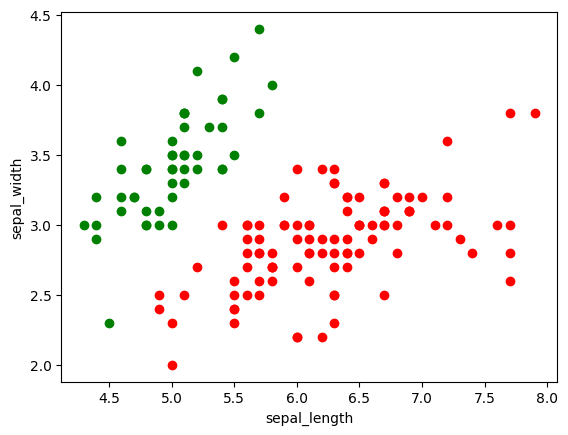

In [137]:
plt.scatter(specie_0['sepal_length'], specie_0['sepal_width'], color='green')
plt.scatter(specie_1['sepal_length'], specie_1['sepal_width'], color='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()